In [ ]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib notebook

xx=[]; yy=[]
x0=[]; y0=[]

img = mpimg.imread('/home/astrodoo/Work/Sketch/test.png')
fig, ax = plt.subplots()
imgplot = ax.imshow(img)

w = widgets.HTML()

i=0
def onclick(event):
    global ax,i,xx,yy
    w.value = 'xdata=%f, ydata=%f'%(event.xdata, event.ydata)
    
    if i<2:
        ax.plot(event.xdata,event.ydata,'o')
        x0.append(event.xdata); y0.append(event.ydata)
    else:
        xx.append(event.xdata); yy.append(event.ydata)
        ax.axhline(y=event.ydata)
        ax.axvline(x=event.xdata)
        
    i=i+1
    
cid = fig.canvas.mpl_connect('button_press_event', onclick)
display(w)

In [ ]:
print xx

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib notebook

class readpos:
    def __init__(self, imgplot, ax, w):
        self.imgplot = imgplot
        self.ax = ax
        self.w  = w
        self.x0 = []; self.y0 = []
        self.xx = []; self.yy = []
        self.ind = 0
        self.cid = imgplot.figure.canvas.mpl_connect('button_press_event', self)
        display(self.w)
    

    def __call__(self, event):
        
        self.w.value = 'xdata=%f, ydata=%f'%(event.xdata, event.ydata)
        if self.ind < 2:
            self.ax.plot(event.xdata,event.ydata,'o')
            self.x0.append(event.xdata); self.y0.append(event.ydata)
        else:
            self.ax.axhline(y=event.ydata)
            self.ax.axvline(x=event.xdata)
            self.xx.append(event.xdata); self.yy.append(event.ydata)
            
        self.ind = self.ind + 1

In [ ]:
img = mpimg.imread('/home/astrodoo/Work/Sketch/test.png')
fig, ax = plt.subplots()
imgplot = ax.imshow(img)
w = widgets.HTML()

pos = readpos(imgplot,ax,w)

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
#%matplotlib notebook

wflag = True
class read_pos:
    def __init__(self, imgplot, ax, *args):
        global wflag
        self.imgplot = imgplot
        self.ax = ax
        if len(args)>=1:
            self.w  = args[0]
        else:
            wflag = False
        self.x0 = []; self.y0 = []
        self.xx = []; self.yy = []
        self.xdata = []; self.ydata = []
        self.ind = 0
        self.cid = imgplot.figure.canvas.mpl_connect('button_press_event', self)
        if wflag: display(self.w)
    

    def __call__(self, event):
        if wflag:
            self.w.value = 'xdata=%f, ydata=%f'%(event.xdata, event.ydata)
        if self.ind < 2:
            self.ax.plot(event.xdata,event.ydata,'o')
            self.x0.append(event.xdata); self.y0.append(event.ydata)
            if wflag:
                self.w.value = 'xdata=%f, ydata=%f'%(event.xdata, event.ydata)
        else:
            self.ax.axhline(y=event.ydata)
            self.ax.axvline(x=event.xdata)
            self.xx.append(event.xdata); self.yy.append(event.ydata)
            
            xinplt = self.calcdatax(event.xdata)
            self.xdata.append(xinplt)
            
            yinplt = self.calcdatay(event.ydata)
            self.ydata.append(yinplt)
            
            if wflag:
                self.w.value = 'xpixel=%f, ypixel=%f ,xdata=%f, ydata=%f'%(event.xdata, event.ydata, xinplt, yinplt)

            
        self.ind = self.ind + 1
        
    def calcdatax(self, xpos):
        xdat = (xpos-self.x0[0])/(self.x0[1]-self.x0[0])*(xlim[1]-xlim[0])+xlim[0]
        return xdat
    def calcdatay(self, ypos):
        ydat = (ypos-self.y0[0])/(self.y0[1]-self.y0[0])*(ylim[1]-ylim[0])+ylim[0]
        return ydat
                

#def img2data(imgplot,ax,w,xlim=[],ylim=[]):
def readpos(*args, **keywords):
    global xlim,ylim

    imgplot = args[0]; ax = args[1]
    if len(args) == 3:
        w = args[2]
        pos=read_pos(imgplot,ax,w)
    elif len(args) == 2:
        pos=read_pos(imgplot,ax)
    else:
        print 'Number of Args should be 2 or 3.'
        return None
    
    if 'xlim' in keywords.keys():
        xlim = keywords['xlim']
    else:
        print 'xlim should be entered.'
        return None
    if 'ylim' in keywords.keys():
        ylim = keywords['ylim']
    else:
        print 'ylim should be entered.'
        return None        
    
    x0pos = pos.x0; y0pos = pos.y0
    xxpos = pos.xx; yypos = pos.yy
    
    a = [1.,2.,3.]
    
    b = np.array(xxpos,dtype=float)
    
    xx = np.asarray(xxpos,dtype=float)
    #x0 = np.asarray(x0pos, dtype=float)#; y0 = np.asarray(y0pos, dtype=float)
    #xx = np.asarray(xxpos, dtype=float)#; yy = np.asarray(yypos, dtype=float)
    
    return pos.xdata

        
#def img2data(*args, **keywords):
#    print len(args)
#    imgplot = args[0]; ax = args[1]
#    if len(args) == 3:
#        w = args[2]
#        pos = readpos(imgplot,ax,w)
#    elif len(args) == 2:
#        pos = readpos(imgplot,ax)
#    else:
#        print 'Number of Args should be 2 or 3.'
#        return None
    
#    if 'xlim' in keywords.keys():
#        xlim = keywords['xlim']
#    else:
#        print 'xlim should be entered.'
#        return None
#    if 'ylim' in keywords.keys():
#        xlim = keywords['ylim']
#    else:
#        print 'ylim should be entered.'
#        return None

#    x0 = np.array(pos.xx, dtype=float); y0 = np.array(pos.yy, dtype=float)
#    xx = np.array(pos.xx, dtype=float); yy = np.array(pos.yy, dtype=float)
        
#    xdat = (xx-x0[0])/(x0[1]-x0[0]) * (xlim[1]-xlim[0]) + xlim[0]
#    ydat = (yy-y0[0])/(y0[1]-y0[0]) * (ylim[1]-ylim[0]) + ylim[0]
    
#    return (xdat,ydat)

In [ ]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

img = mpimg.imread('/home/astrodoo/Work/Sketch/test.png')
fig, ax = plt.subplots()
imgplot = ax.imshow(img)
w = widgets.HTML()

#pos = readpos(imgplot,ax,w)
#pos = readpos(imgplot,ax)

xxx = readpos(imgplot,ax,w,xlim=[1.,100.],ylim=[1.,100.])

In [ ]:
print np.asarray(xxx, dtype=float)

In [ ]:
xx = np.asarray(pos.xx, dtype=float)

In [ ]:
print xxx

In [1]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np

wflag = True
class readimg:
    def __init__(self, *args, **keywords):
        global wflag
        
        if len(args) == 2:    
            self.imgplot = args[0]; self.ax = args[1]
            wflag = False
        elif len(args) == 3:
            self.imgplot = args[0]; self.ax = args[1]
            self.w = args[2]
        else:
            print 'Number of Args should be 2 or 3.'
            return None  
        
        if 'xlim' in keywords.keys():
            self.xlim = keywords['xlim']
        else:
            print 'xlim should be entered.'
            return None
        if 'ylim' in keywords.keys():
            self.ylim = keywords['ylim']
        else:
            print 'ylim should be entered.'
            return None
        
        if 'xlog' in keywords.keys():
            self.xlog = keywords['xlog']
        else:
            self.xlog = False
        if 'ylog' in keywords.keys():
            self.ylog = keywords['ylog']
        else:
            self.ylog = False
            
        self.x0 = []; self.y0 = []
        self.xx = []; self.yy = []
        self.xdata = []; self.ydata = []
        self.ind = 0
        self.cid = imgplot.figure.canvas.mpl_connect('button_press_event', self)
        if wflag: display(self.w)
    

    def __call__(self, event):
        if wflag:
            self.w.value = 'xdata=%f, ydata=%f'%(event.xdata, event.ydata)
        if self.ind < 2:
            self.ax.plot(event.xdata,event.ydata,'o')
            self.x0.append(event.xdata); self.y0.append(event.ydata)
            if wflag:
                self.w.value = 'xdata=%f, ydata=%f'%(event.xdata, event.ydata)
        else:
            self.ax.axhline(y=event.ydata)
            self.ax.axvline(x=event.xdata)
            self.xx.append(event.xdata); self.yy.append(event.ydata)
            
            if self.xlog:
                xinplt = self.calcdataxlg(event.xdata)
            else:
                xinplt = self.calcdatax(event.xdata)
            self.xdata.append(xinplt)
            
            if self.ylog:
                yinplt = self.calcdataylg(event.ydata)
            else:
                yinplt = self.calcdatay(event.ydata)
            self.ydata.append(yinplt)
            
            if wflag:
                self.w.value = 'xpixel=%f, ypixel=%f ,xdata=%f, ydata=%f'%(event.xdata, event.ydata, xinplt, yinplt)

            
        self.ind = self.ind + 1
        
    def calcdatax(self, xpos):
        xdat = (xpos-self.x0[0])/(self.x0[1]-self.x0[0])*(self.xlim[1]-self.xlim[0])+self.xlim[0]
        return xdat
    
    def calcdatay(self, ypos):
        ydat = (ypos-self.y0[0])/(self.y0[1]-self.y0[0])*(self.ylim[1]-self.ylim[0])+self.ylim[0]
        return ydat
    
    def calcdataxlg(self, xpos):
        xlimlg = np.log10(self.xlim)
        xdat = np.power(10.,(xpos-self.x0[0])/(self.x0[1]-self.x0[0])*(xlimlg[1]-xlimlg[0])+xlimlg[0])
        return xdat
    
    def calcdataylg(self, ypos):
        ylimlg = np.log10(self.ylim)
        ydat = np.power(10.,(ypos-self.y0[0])/(self.y0[1]-self.y0[0])*(ylimlg[1]-ylimlg[0])+ylimlg[0])
        return ydat

<IPython.core.display.Javascript object>


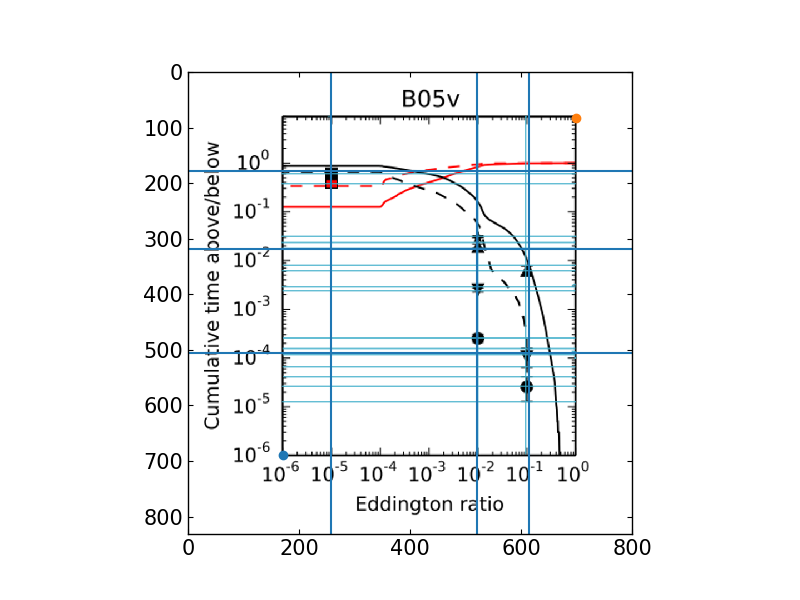

In [2]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib notebook

img = mpimg.imread('/home/astrodoo/Work/Sketch/test.png')
fig, ax = plt.subplots()
imgplot = ax.imshow(img)
w = widgets.HTML()

#pos = readpos(imgplot,ax,w)
#pos = readpos(imgplot,ax)

xxx = readimg(imgplot,ax,w,xlim=[1e-6,1.],ylim=[1e-6,9.],xlog=True,ylog=True)

In [1]:
-

In [1]:
-

In [4]:
print xxx.ydata

[0.72806284921665443, 0.017987307436770412, 0.00012942828798413126]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.random.rand(10))

def onclick(event):
    print('button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
          (event.button, event.x, event.y, event.xdata, event.ydata))

cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [ ]:
print np.shape(img)

In [ ]:
from matplotlib import pyplot as plt

%pylab notebook

class LineBuilder:
    def __init__(self, line):
        self.line = line
        self.xs = list(line.get_xdata())
        self.ys = list(line.get_ydata())
        self.cid = line.figure.canvas.mpl_connect('button_press_event', self)

    def __call__(self, event):
        print('click', event)

        if event.inaxes!=self.line.axes: return
        self.xs.append(event.xdata)
        self.ys.append(event.ydata)
             
        self.line.set_data(self.xs, self.ys)
        self.line.figure.canvas.draw()
  
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_title('click to build line segments')
line, = ax.plot([0], [0])  # empty line
linebuilder = LineBuilder(line)



In [ ]:
print linebuilder.xs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('click on points')

line, = ax.plot(np.random.rand(100), 'o', picker=5)  # 5 points tolerance

def onpick(event):
    thisline = event.artist
    xdata = thisline.get_xdata()
    ydata = thisline.get_ydata()
    ind = event.ind
    points = tuple(zip(xdata[ind], ydata[ind]))
#    print('onpick points:', points)

fig.canvas.mpl_connect('pick_event', onpick)

plt.show()

In [ ]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.random.rand(10))

def onclick(event):
    print('button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
          (event.button, event.x, event.y, event.xdata, event.ydata))

cid = fig.canvas.mpl_connect('button_press_event', onclick)


In [ ]:
fig.canvas.mpl_disconnect(cid)

In [ ]:
import numpy as np

def test(a=[1,2]):
    b = np.asarray(a)
    return b

c = test()

In [ ]:
print c

In [ ]:
class test:
    def __init__(self, *args):
        self.a=args[0]
        
b = test('a')

In [ ]:
print b.a

In [ ]:
import numpy as np

a = [10.,100.]

b = np.log10(a)

print b[0]